### Import Libraries

In [1]:
import pandas as pd
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

### Dataset information
* Product Name
* Rent Price
* Product Photo
* Renters
* Description

In [2]:
dataset = pd.read_csv('../data/cleaned_dataset.csv')
dataset.head()

,product_name,rent_price,url_photo,link,renters,description,hiking,cosplay
0,Aksesoris Fashion Topeng Cosplay Pesta Hallowe...,3650.0,https://images.tokopedia.net/img/cache/200-squ...,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...,LenkaWeddingShop,"𝐑𝐄𝐀𝐃𝐘 𝐒𝐓𝐎𝐊, 𝐋𝐀𝐍𝐆𝐒𝐔𝐍𝐆 𝐊𝐈𝐑𝐈𝐌 !! 𝐏𝐑𝐈𝐕𝐀𝐒𝐈 𝐃𝐈𝐉𝐀𝐌𝐈𝐍...",0,1
1,Topeng Pesta Unisex Cosplay Aksesoris Party Pu...,3650.0,https://images.tokopedia.net/img/cache/200-squ...,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...,LenkaWeddingShop,"𝐑𝐄𝐀𝐃𝐘 𝐒𝐓𝐎𝐊, 𝐋𝐀𝐍𝐆𝐒𝐔𝐍𝐆 𝐊𝐈𝐑𝐈𝐌 !! 𝐏𝐑𝐈𝐕𝐀𝐒𝐈 𝐃𝐈𝐉𝐀𝐌𝐈𝐍...",0,1
2,Aksesoris Pesta Unisex Topeng Cosplay Hallowee...,3200.0,https://images.tokopedia.net/img/cache/200-squ...,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...,LenkaWeddingShop,"𝐑𝐄𝐀𝐃𝐘 𝐒𝐓𝐎𝐊, 𝐋𝐀𝐍𝐆𝐒𝐔𝐍𝐆 𝐊𝐈𝐑𝐈𝐌 !! 𝐏𝐑𝐈𝐕𝐀𝐒𝐈 𝐃𝐈𝐉𝐀𝐌𝐈𝐍...",0,1
3,2pcs Telinga Elf Kuping Palsu Elf Ears Aksesor...,1900.0,https://images.tokopedia.net/img/cache/200-squ...,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...,ITOKOTOO,"😄Selamat datang, Anda dapat menghubungi kami j...",0,1
4,Ekor Kucing Cosplay Cat Cosplay Kawaii Cute Ha...,3500.0,https://images.tokopedia.net/img/cache/200-squ...,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...,Mireading,"HI, welcome to our store - We provide various ...",0,1


In [3]:
print("Number of records: ", dataset.shape[0])
print("Number of fields: ", dataset.shape[1])

Number of records:  5377
Number of fields:  8


### Display products names and preprocess them

In [4]:
dataset['product_name']

0       Aksesoris Fashion Topeng Cosplay Pesta Hallowe...
1       Topeng Pesta Unisex Cosplay Aksesoris Party Pu...
2       Aksesoris Pesta Unisex Topeng Cosplay Hallowee...
3       2pcs Telinga Elf Kuping Palsu Elf Ears Aksesor...
4       Ekor Kucing Cosplay Cat Cosplay Kawaii Cute Ha...
                              ...                        
5372    Dunlopillo Hooded Thermal Blanket ( Selimut To...
5373    TERMURAH KING RABBIT THERMAL BLANKET SELIMUT F...
5374    NEW PRODUK KING RABBIT THERMAL BLANKET FLEECE ...
5375    dunlopillo thermal & travel blanket black seli...
5376    TaffSPORT Selimut Darurat Emergency Blanket Th...
Name: product_name, Length: 5377, dtype: object

Removing unwanted characters and words in product name

In [5]:
dataset['product_name'] = dataset['product_name'].apply(lambda x: x.replace(u'\xa0',u' '))
dataset['product_name'] = dataset['product_name'].apply(lambda x: x.replace('\u200a',' '))

### Tokenization

In [6]:
tokenizer = Tokenizer(oov_token='<oov>') # For those words which are not found in word_index
tokenizer.fit_on_texts(dataset['product_name'])
total_words = len(tokenizer.word_index) + 1

print("Total number of words: ", total_words)
print("Word: ID")
print("------------")
print("<oov>: ", tokenizer.word_index['<oov>'])
print("hiking: ", tokenizer.word_index['hiking'])
print("cosplay: ", tokenizer.word_index['cosplay'])

Total number of words:  4154
Word: ID
------------
<oov>:  1
hiking:  219
cosplay:  2


Titles text into sequences and make n_gram model

In [7]:
input_sequences = []
for line in dataset['product_name']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    #print(token_list)
    
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# print(input_sequences)
print("Total input sequences: ", len(input_sequences))

Total input sequences:  47357


Make all product names with same length by using padding

In [8]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 356,   7])


Prepare features and labels

In [9]:
# create features and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [10]:
print(xs[5])
print(labels[5])
print(ys[5][14])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  32 356   7   2
  30  11]
54
0.0


## Bi- LSTM Neural Network Model training

In [11]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=50, verbose=1)

Epoch 1/50


c:\Users\LEN0V0\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1480/1480 [==============================] - 105s 69ms/step - loss: 5.7656 - accuracy: 0.1077
Epoch 2/50
1480/1480 [==============================] - 87s 59ms/step - loss: 3.7311 - accuracy: 0.3409
Epoch 3/50
1480/1480 [==============================] - 121s 82ms/step - loss: 2.7531 - accuracy: 0.5094
Epoch 4/50
1480/1480 [==============================] - 86s 58ms/step - loss: 2.1986 - accuracy: 0.5913
Epoch 5/50
1480/1480 [==============================] - 76s 51ms/step - loss: 1.8259 - accuracy: 0.6381
Epoch 6/50
1480/1480 [==============================] - 76s 51ms/step - loss: 1.5432 - accuracy: 0.6789
Epoch 7/50
1480/1480 [==============================] - 76s 52ms/step - loss: 1.3224 - accuracy: 0.7129
Epoch 8/50
1480/1480 [==============================] - 76s 51ms/step - loss: 1.1394 - accuracy: 0.7461
Epoch 9/50
1480/1480 [==============================] - 79s 53ms/step - loss: 0.9914 - accuracy: 0.7755
Epoch 10/50
1480/1480 [==============================] - 78s 53ms/step - 

## Plotting model accuracy and loss

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

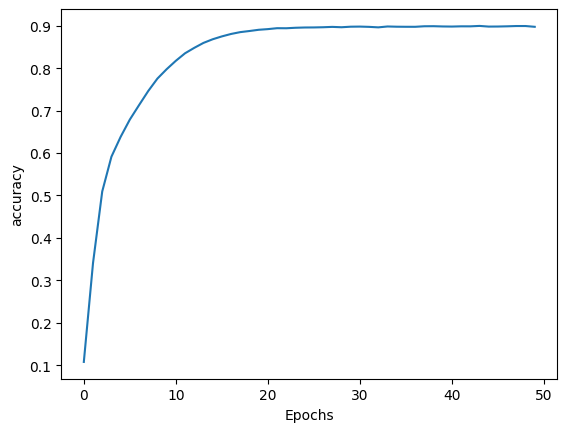

In [13]:
plot_graphs(history, 'accuracy')

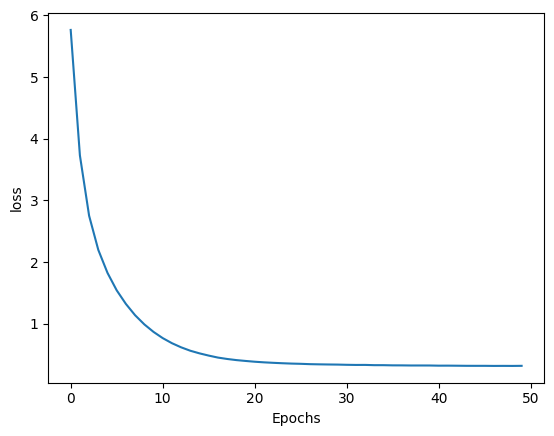

In [14]:
plot_graphs(history, 'loss')

In [20]:
seed_text = "kostum"
next_words = 3
num_predictions = 5

predicted_products = []

for _ in range(num_predictions):
    current_seed = seed_text
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([current_seed])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        
        # Get the probabilities for the next word
        predicted_probs = model.predict(token_list, verbose=0)[0]
        
        # Sample from the distribution
        predicted_class = np.random.choice(len(predicted_probs), p=predicted_probs)
        
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_class:
                output_word = word
                break
        current_seed += " " + output_word
    predicted_products.append(current_seed)

for i, prd in enumerate(predicted_products):
    print(f"{prd}")


kostum labu halloween anak
kostum cosplay iron man
kostum onesie pikachu pokemon
kostum sadako cosplay hantu
kostum anak spiderman far
